In [1]:
import pickle
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.utils import np_utils
import time

In [2]:
pickle_in_features = open('/research/Projects/Potato plant disease/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/research/Projects/Potato plant disease/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

### Splitting the data as training and testing 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2)

In [5]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105, 3)


### Loading the VGG19 model

In [6]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = VGG19(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model.get_layer('fc2').output
# x = Flatten(name='flatten')(last_layer)
out = Dense(classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

print(image_input.shape)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t = time.time()

hist = custom_vgg_model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/20
53/53 - 516s - loss: 1.1346 - accuracy: 0.5327 - val_loss: 0.6927 - val_accuracy: 0.7055
Epoch 2/20
53/53 - 305s - loss: 0.7412 - accuracy: 0.6764 - val_loss: 0.5103 - val_accuracy: 0.7957
Epoch 3/20
53/53 - 325s - loss: 0.6049 - accuracy: 0.7363 - val_loss: 0.4438 - val_accuracy: 0.8147
Epoch 4/20
53/53 - 321s - loss: 0.5189 - accuracy: 0.7690 - val_loss: 0.3494 - val_accuracy: 0.8599
Epoch 5/20
53/53 - 329s - loss: 0.4758 - accuracy: 0.7898 - val_loss: 0.3171 - val_accuracy: 0.8884
Epoch 6/20
53/53 - 327s - loss: 0.3788 - accuracy: 0.8510 - val_loss: 0.3496 - val_accuracy: 0.8694
Epoch 7/20
53/53 - 330s - loss: 0.3848 - accuracy: 0.8373 - val_loss: 0.5447 - val_accuracy: 0.7648
Epoch 8/20
53/53 - 337s - loss: 0.3741 - accuracy: 0.8403 - val_loss: 0.2432 - val_accuracy: 0.9169
Epoch 9/20
53/53 - 325s - loss: 0.3183 - accuracy: 0.8759 - val_loss: 0.4336 - val_accuracy: 0.8266
Epoch 10/20
53/53 - 294s - loss: 0.3005 - accuracy: 0.8700 - val_loss: 0.2438 - val_accuracy: 0.8979

In [10]:
(loss, accuracy) = custom_vgg_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 161s - loss: 0.4571 - accuracy: 0.8040
[INFO] loss=0.4571, accuracy: 80.3987%


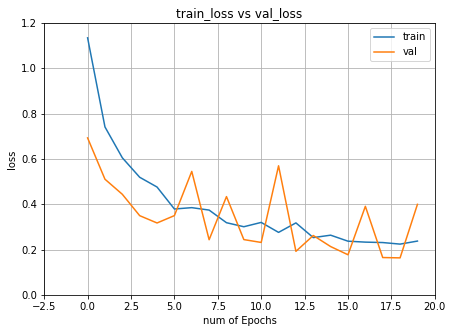

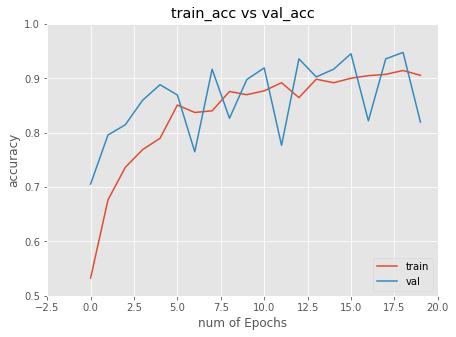

In [9]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(20)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])